In [1]:
from synthetic_data import return_synthetic_data,plot_synthetic
import sys  
sys.path.insert(0, "/".join(sys.path[0].split("/")[0:-2])+('/src'))
from sisal.solver import Solver
from sisal.utils import normalize_train_test_full_loader
import argparse
from sisal.plot import Plot
import random
import numpy as np
import torch
from sisal.plot import compute_latent_synthetic

/Users/pldelacour/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
centroids,SNR,mask,mask_to_name = return_synthetic_data()
print('centroids = ',centroids.shape)
print('SNR : ', SNR.shape)
print('mask : ', mask.shape)

centroids =  (238428, 212)
SNR :  (238428,)
mask :  (238428,)


In [3]:
train_loader, test_loader, full_index_loader = normalize_train_test_full_loader(centroids,mask,batch_size=32,alpha=SNR)

data_shape =  (358, 666)
#### Plot of spatial image
#### Plot spectra signals


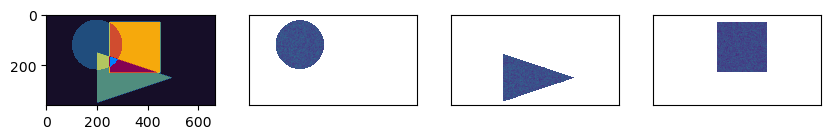

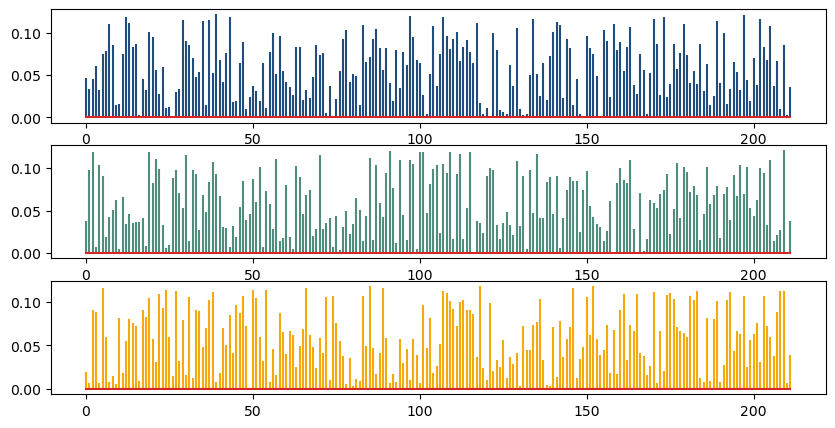

In [4]:
plot_synthetic()

## Arguments for the Beta VAE

In [4]:
args = argparse.Namespace(
    beta=4, 
    z_dim=2, 
    epochs=40,
    device ='cpu',
    save_model_epochs=False,
    save_loss = False,
    train=True)
in_size = centroids.shape[1]

In [6]:
# For reproducibility 

# Set a fixed seed
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)  # Ensures reproducibility across GPUs

# Ensure deterministic behavior
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [7]:
net = Solver(args,in_size)

In [4]:
PATH = 'model_synthetic.pth' #path where the model is saved

In [9]:
net.train(train_loader, test_loader,PATH) 

### before epochs
EPOCH 1:
  batch 1000 loss: 52.13400386238098
  batch 2000 loss: 38.92984971427917
  batch 3000 loss: 34.88791791343689
  batch 4000 loss: 33.3888985710144
  batch 5000 loss: 32.963188568115235
LOSS train 32.963188568115235 valid 30.0858050391178
----------------Saving Model Epoch 1
EPOCH 2:
  batch 1000 loss: 31.58859931564331
  batch 2000 loss: 31.181508865356445
  batch 3000 loss: 31.080118700027466
  batch 4000 loss: 31.074810832977295
  batch 5000 loss: 31.11869153404236
LOSS train 31.11869153404236 valid 30.005342556486195
----------------Saving Model Epoch 2
EPOCH 3:
  batch 1000 loss: 30.810562660217286
  batch 2000 loss: 30.551028512954712
  batch 3000 loss: 30.57330150604248
  batch 4000 loss: 30.391347213745117
  batch 5000 loss: 30.54917134857178
LOSS train 30.54917134857178 valid 29.765821270014616
----------------Saving Model Epoch 3
EPOCH 4:
  batch 1000 loss: 30.320566354751588
  batch 2000 loss: 30.160307527542113
  batch 3000 loss: 30.52855234718323


'model_synthetic.pth'

In [16]:
p = Plot(PATH,args.device,train_loader,test_loader,full_index_loader)

Compute Latent
End Compute latent


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


### Label = 
[0. 1. 2. 3. 4. 5. 6. 7.]
Using 23840 samples
col_dict =  {0: '#160E28', 1: '#204D7D', 2: '#508D7E', 3: '#B3C65F', 4: '#F6A90C', 5: '#D04C2F', 6: '#850253', 7: [0.0, 0.5, 1.0, 1.0]}
mask_to_name =  {0: 'noise', 1: 'c', 2: 't', 3: 't+c', 4: 's', 5: 's+c', 6: 's+t', 7: 's+t+c'}


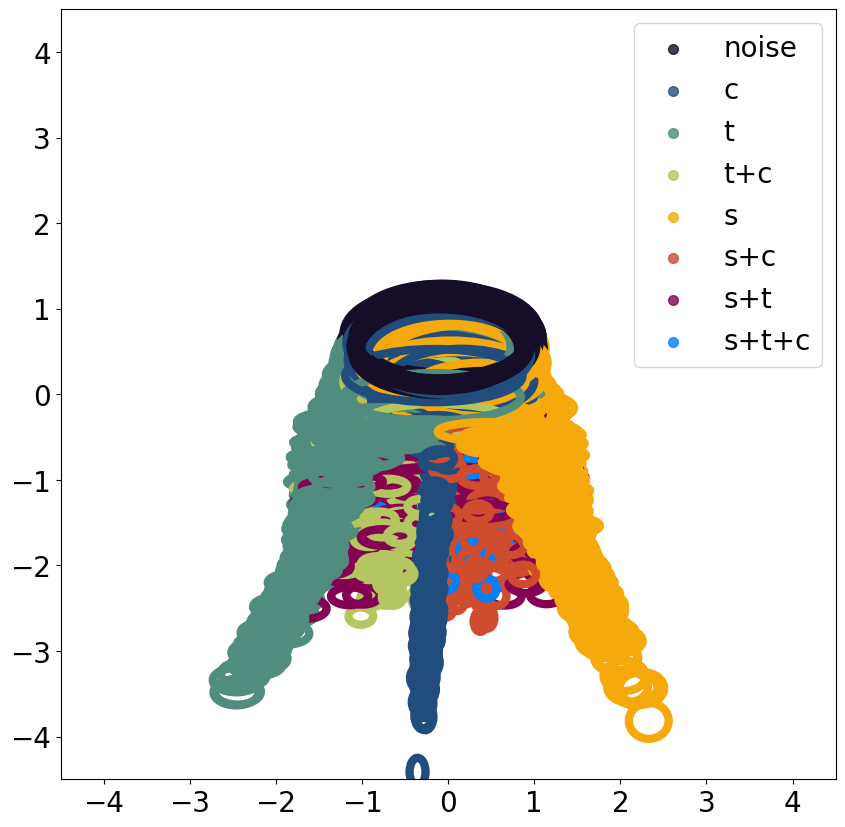

In [11]:
p.plot_latent_dim_with_var(mask_to_name,p=0.5)

In [5]:
model = torch.load(PATH, map_location=torch.device('cpu'))
full_latent,vars,label, coeff = compute_latent_synthetic(full_index_loader,model)
print(full_latent.shape)

Compute Latent
n loader =  47686
latent shape =  (47686, 3)
End Compute latent
(47680, 3)


In [11]:
print(p.full_latent.shape)
print(centroids.shape)

(47680, 3)
(238428, 212)


Using 33376 samples


ValueError: 'c' argument has 33376 elements, which is inconsistent with 'x' and 'y' with size 47680.

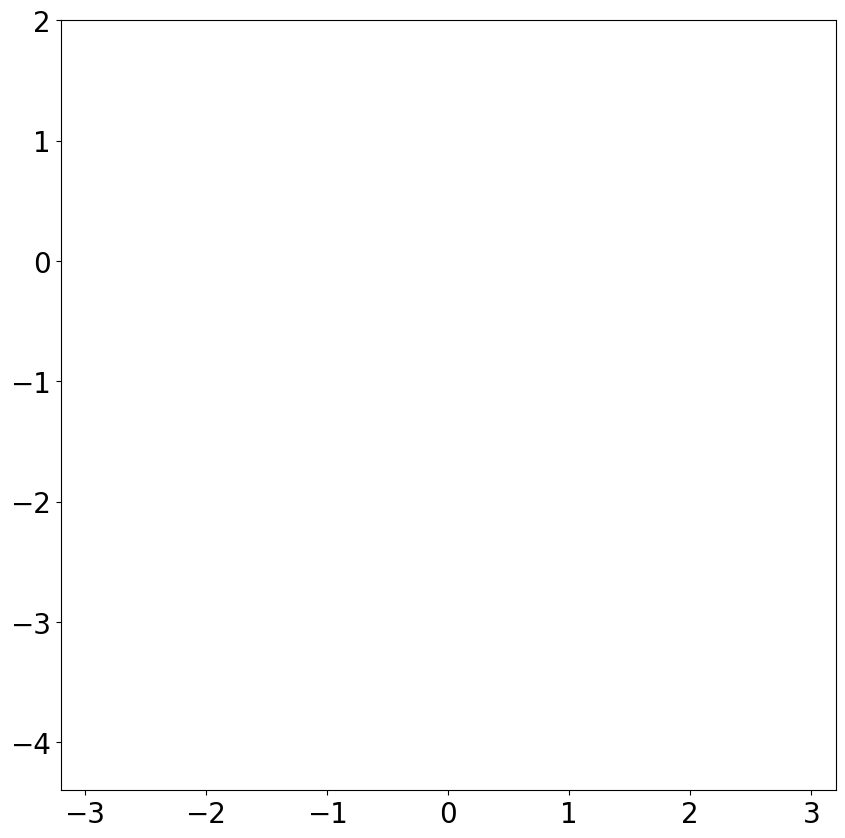

In [8]:
p.plot_latent_dim_coeff(SNR)